# K-Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a set of data points into distinct groups or clusters based on their features. 

The goal of K-means clustering is to divide the data into clusters in such a way that points within the same cluster are more similar to each other compared to points in other clusters. 

This algorithm is commonly used for data analysis, pattern recognition, and various other applications in fields like computer vision, data mining, and customer segmentation.

### EDA on Mall_Customers Dataset

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Check the dimensions of dataset

df.shape

(200, 5)

In [4]:
# Check data types of each column

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values

In [6]:
# Check for duplicate values

df.duplicated().sum()

0

In [7]:
# Calculate summary statistics

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include= 'O')

,Genre
count,200
unique,2
top,Female
freq,112


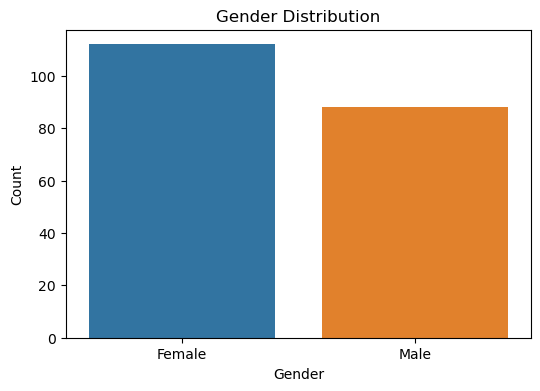

In [9]:
# Distribution of gender

gender_counts = df['Genre'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

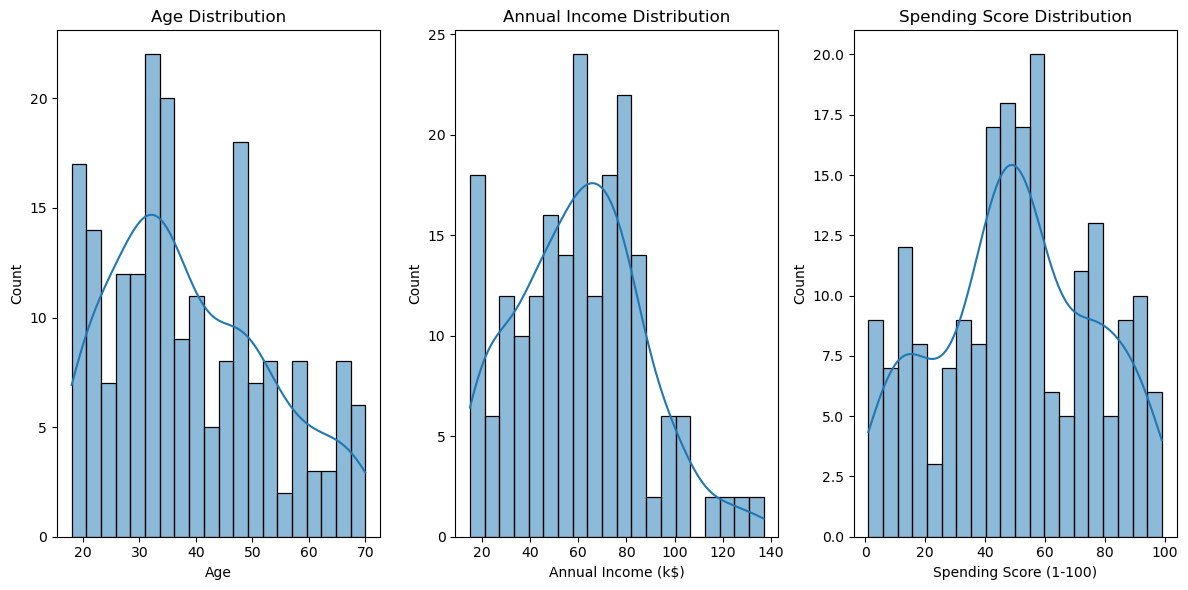

In [10]:
# Subplots 

plt.figure(figsize=(12,6))

# Distribution of age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Distribution of annual income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')


# Distribution of spending score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

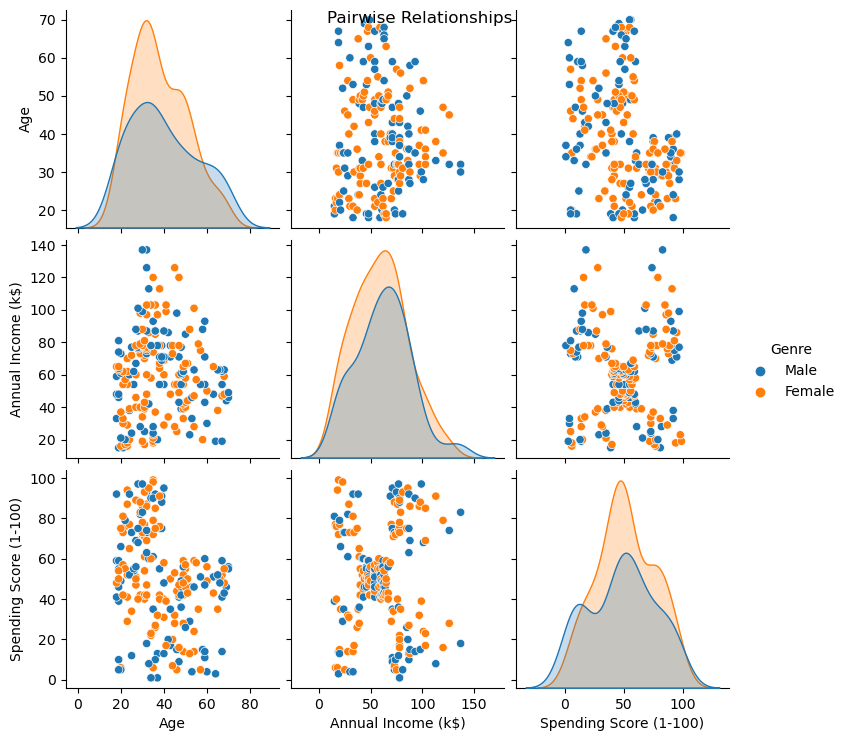

In [11]:
# Pairwise relationships using pairplot

sns.pairplot(df.drop('CustomerID', axis=1), hue='Genre', diag_kind='kde')
plt.suptitle('Pairwise Relationships')
plt.show()


### Building K-Means Clustering Model

In [12]:
# Select features for clustering

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [13]:
# Importing the necessary libraries to build a model

from sklearn.cluster import KMeans

# Choose the number of clusters (K)
num_clusters = 6

# Initialize KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [14]:
# Perform clustering- Fit the model to the data

kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [15]:
# Add cluster labels to the original dataset
df["Cluster"] = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

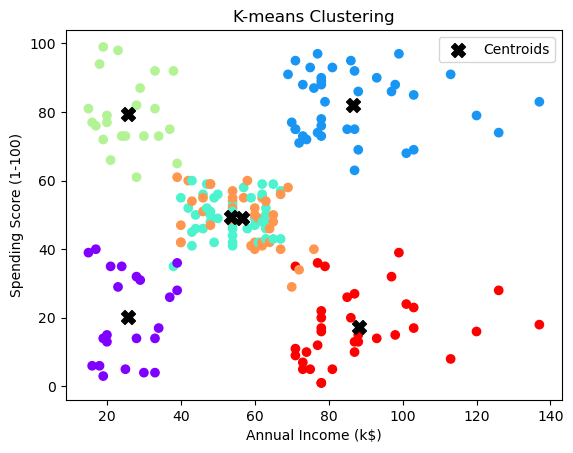

In [16]:
# Visualize the clusters

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="rainbow")
plt.scatter(centroids[:, 1], centroids[:, 2], marker='X', s=100, c='black', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-means Clustering")
plt.legend()
plt.show()


In [17]:
# Display the first few rows of the updated dataset

df['Cluster']

0      0
1      3
2      0
3      3
4      0
      ..
195    1
196    5
197    1
198    5
199    1
Name: Cluster, Length: 200, dtype: int32

In [18]:
# Model Evaluation

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluate clustering using various metrics
silhouette_avg = silhouette_score(X, kmeans.labels_)
db_index = davies_bouldin_score(X, kmeans.labels_)
ch_index = calinski_harabasz_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.4523566166018854
Davies-Bouldin Index: 0.7443002999569567
Calinski-Harabasz Index: 166.71357349776875


- The silhouette score ranges from -1 to 1. A higher silhouette score indicates that the data points are well-clustered and that they are closer to the data points. A score of 0.452 suggests that the clustering is reasonable but could potentially be improved.

- The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin index indicates better clustering, with values closer to 0 being better. A lower value of 0.744 suggests that the clusters are less overlapping and better separated.

- The Calinski-Harabasz index, also known as the Variance Ratio Criterion, measures the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz index suggests that the clusters are well-separated and distinct. A higher value of 166.713 suggests that the clusters are more distinct.

In summary, based on these evaluation metrics, your K-means clustering results are reasonable, but there might be some room for improvement. 

In [19]:
# New data points for prediction
new_data = np.array([[25, 70, 80], [40, 60, 30]])

# Predict the cluster for new data points
predicted_clusters = kmeans.predict(new_data)

# Print the predicted clusters
for i, cluster in enumerate(predicted_clusters):
    print(f"New data point {new_data[i]} belongs to cluster {cluster}")

New data point [25 70 80] belongs to cluster 1
New data point [40 60 30] belongs to cluster 4


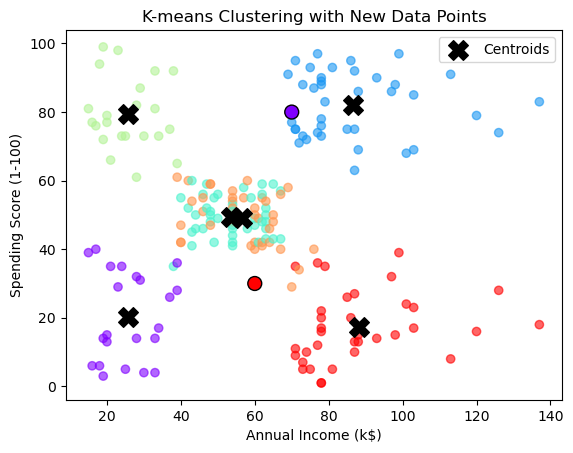

In [20]:
# Visualization

# Scatter plot of original data points
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=df["Cluster"], cmap="rainbow", alpha=0.6)

# Scatter plot of cluster centroids
plt.scatter(centroids[:, 1], centroids[:, 2], marker='X', s=200, c='black', label='Centroids')

# Scatter plot of new data points with predicted clusters
plt.scatter(new_data[:, 1], new_data[:, 2], c=predicted_clusters, marker='o', s=100, edgecolors='k', cmap="rainbow")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-means Clustering with New Data Points")
plt.legend()
plt.show()